In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

print(f'pandas: {pd.__version__}')
print(f'numpy: {np.__version__}')
print(f'matplotlib: {matplotlib.__version__}')
print(f'seaborn: {sns.__version__}')

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', str)

pandas: 2.1.1
numpy: 1.26.0
matplotlib: 3.8.0
seaborn: 0.13.0


# Load Index of Multiple Deprivation (IMD) and the Bank of England Mortgage Rate Data

Index of Multiple Deprivation (IMD) is a measure of relative deprivation for small areas in England. It is used to identify areas of deprivation and target public services to meet local needs. The Index of Multiple Deprivation 2019 (IMD 2019) is the most up-to-date measure of relative deprivation for small areas in England. It available at lower layer super output area (LSOA) level and is based on a range of data sources, including the 2011 Census, the Index of Child Deprivation 2019 (ICD 2019) and the English Indices of Deprivation 2019 (EID 2019). The dataset can be downloaded from the [Office for National Statistics (ONS)](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019).

Mortgage data can be found at [Bank of England Database](https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?Travel=NIxAZxSUx&FromSeries=1&ToSeries=50&DAT=RNG&FD=1&FM=Jan&FY=2012&TD=13&TM=Nov&TY=2027&FNY=Y&CSVF=TT&html.x=66&html.y=26&SeriesCodes=IUMZICQ,IUMBV34,IUMZICR,IUMB482,IUM2WTL,IUMBV37,IUMBV42,IUM5WTL,IUMBV45,IUMBV48,IUMB479,IUM2WDT,IUMBV24,IUMTLMV,IUMZID4,IUMBX67,IUMHPTL,IUMCCTL,IUMODTL,IUMB6VJ,IUMB6VK,IUMB6VL,IUMB6VM,IUMB6VN,IUMZID2,IUMWTFA,IUMB6RH,IUMB6RI&UsingCodes=Y&Filter=N&title=Quoted%20Rates&VPD=Y)

In [2]:
def load_imd_data():
    df = pd.read_excel('./data/input/File_2_-_IoD2019_Domains_of_Deprivation.xlsx', header=1, sheet_name=1)

    # Only keep the columns we need
    df = df.iloc[:, [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
    df.columns = ['LSOA', 'LSOAName', 'IMD', 'IMDDecile', 'Inc', 'IncDecile', 'Emp', 'EmpDecile', 'Edu', 'EduDecile', 'Crm', 'CrmDecile', 'HouseBar', 'HouseBarDecile', 'Env', 'EnvDecile']

    df.set_index('LSOA', inplace=True)
    df = df.add_prefix('IMD_')
    return df

imd_df = load_imd_data()
imd_df.head()

,IMD_LSOAName,IMD_IMD,IMD_IMDDecile,IMD_Inc,IMD_IncDecile,IMD_Emp,IMD_EmpDecile,IMD_Edu,IMD_EduDecile,IMD_Crm,IMD_CrmDecile,IMD_HouseBar,IMD_HouseBarDecile,IMD_Env,IMD_EnvDecile
LSOA,,,,,,,,,,,,,,,
E01000002,City of London 001B,30379,10,29901,10,31190,10,32832,10,29705,10,32789,10,11707,4
E01000003,City of London 001C,14915,5,18510,6,15103,5,26386,9,17600,6,29363,9,2157,1
E01000005,City of London 001E,8678,3,6029,2,7833,3,12370,4,17907,6,31059,10,2217,1
E01000006,Barking and Dagenham 016A,14486,5,14023,5,21692,7,17511,6,21581,7,18848,6,1033,1
E01000007,Barking and Dagenham 015A,7256,3,6261,2,11487,4,20536,7,16414,5,4925,2,274,1


In [3]:
import modules.utils as utils

def load_mortgage_rate_data():
    saved_name = 'saved_mortgage_rate_data'

    saved_df = utils.load_data(
        saved_name,
        lambda f: pd.read_csv(f, parse_dates=['Date'], low_memory=False)
    )

    if saved_df is not None:
        return saved_df
    
    columns = list(range(0, 13)) + [15]

    # More readable column names
    col_names = ['Date', '2Y_60F', '2Y_75F', '2Y_85F', '2Y_90F', '2Y_95F', '3Y_75F', '5Y_75F', '5Y_95F', '10Y_75F', 
                 '2Y_75V', '2Y_90V', '2Y_95V', '2Y_75BTL']
    
    df = pd.read_csv('./data/input/Quoted Rates  Bank of England  Database.csv', usecols=columns, parse_dates=['Date'])
    df.columns = col_names

    # Make sure the rates are in numeric format
    for col in df.columns:
        if col != 'Date':
            df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.add_prefix('RATE_')        

    # Save the data
    utils.save_data(df, saved_name)

    return df

rate_df = load_mortgage_rate_data()
rate_df.head()

Loading saved data from ./data/saved/saved_mortgage_rate_data.parquet...


,RATE_Date,RATE_2Y_60F,RATE_2Y_75F,RATE_2Y_85F,RATE_2Y_90F,RATE_2Y_95F,RATE_3Y_75F,RATE_5Y_75F,RATE_5Y_95F,RATE_10Y_75F,RATE_2Y_75V,RATE_2Y_90V,RATE_2Y_95V,RATE_2Y_75BTL
0,2023-09-30,5.91,5.94,6.15,6.38,6.75,5.78,5.23,6.01,5.11,5.68,6.32,6.25,5.95
1,2023-08-31,6.19,6.21,6.37,6.59,6.92,6.02,5.52,6.29,5.15,5.66,6.29,6.19,6.1
2,2023-07-31,6.24,6.25,6.38,6.51,6.88,5.94,5.72,6.28,5.19,5.44,5.99,5.83,6.23
3,2023-06-30,5.47,5.49,5.59,5.75,6.28,5.16,4.95,5.7,4.83,4.97,5.57,5.26,5.48
4,2023-05-31,4.69,4.72,4.92,5.08,5.67,4.46,4.28,5.15,4.4,4.71,5.26,4.74,4.78


In [4]:
from modules.utils import load_saved_data

ppd_df = load_saved_data('1_ppd_epc_data')

Loading saved data from ./data/saved/1_ppd_epc_data.parquet...


In [5]:
ppd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453039 entries, {DBA933F8-E298-669D-E053-6B04A8C0AD56} to {D707E536-8794-0AD9-E053-6B04A8C067CC}
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   PPD_Price                       453039 non-null  int64         
 1   PPD_TransferDate                453039 non-null  datetime64[ns]
 2   PPD_Postcode                    450619 non-null  object        
 3   PPD_PropertyType                453039 non-null  object        
 4   PPD_OldNew                      453039 non-null  bool          
 5   PPD_Duration                    453039 non-null  object        
 6   PPD_PAON                        453039 non-null  object        
 7   PPD_SAON                        171996 non-null  object        
 8   PPD_Street                      452948 non-null  object        
 9   PPD_Locality                    28722 non-null   object      

In [11]:
def enrich_with_imd_and_rate_data(ppd_df, imd_df, rate_df):
    ppd_df = ppd_df.reset_index()[['PPD_ID', 'PPD_Price', 'PPD_TransferDate', 'ONSUD_LSOA']]
    ppd_df = ppd_df.sort_values(by='PPD_TransferDate')

    rate_df['RATE_Date'] = rate_df['RATE_Date'].dt.to_period('M').dt.to_timestamp()
    rate_df.sort_values(by='RATE_Date', inplace=True)

    ppd_df = pd.merge(ppd_df, imd_df, how='left', left_on='ONSUD_LSOA', right_index=True)
    ppd_df = pd.merge_asof(ppd_df, rate_df, left_on='PPD_TransferDate', right_on='RATE_Date')

    ppd_df.drop(columns=['RATE_Date', 'ONSUD_LSOA'], inplace=True) 
    ppd_df.set_index('PPD_ID', inplace=True)

    return ppd_df

enriched_ppd_df = enrich_with_imd_and_rate_data(ppd_df, imd_df, rate_df)

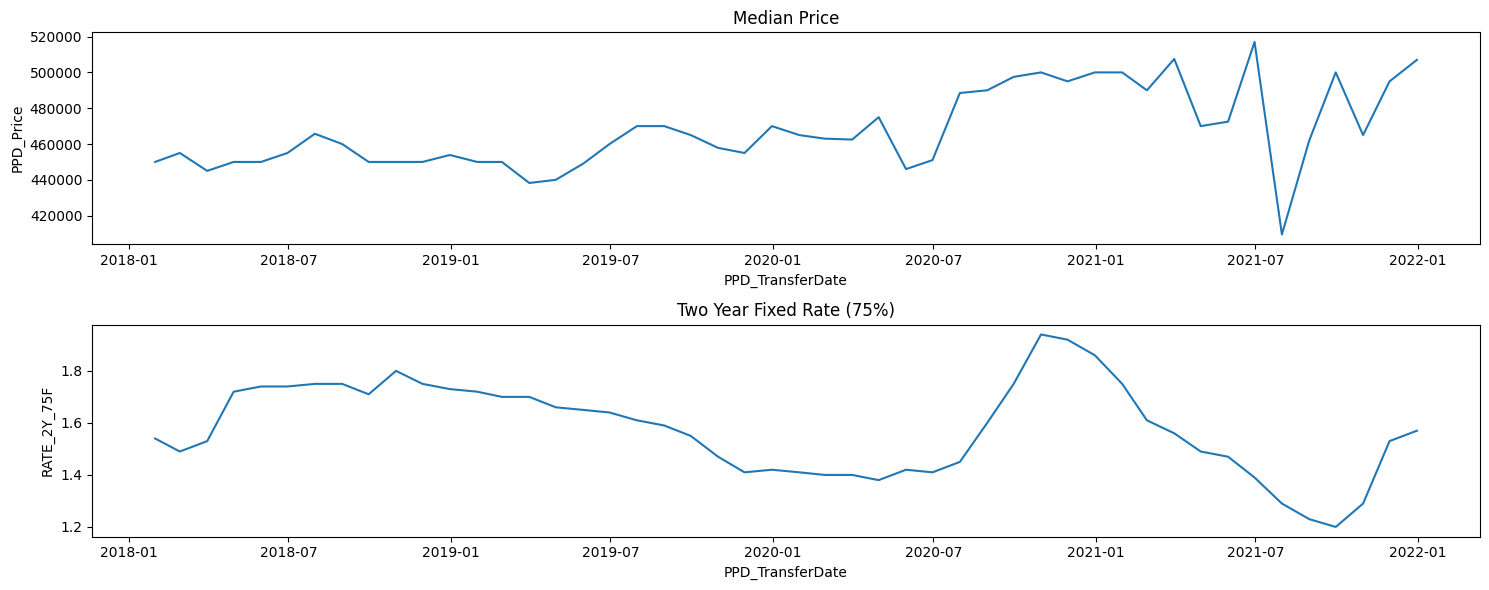

In [13]:
# Set the color palette
sns.set_palette("tab10")

median_price = enriched_ppd_df.resample('M', on='PPD_TransferDate')['PPD_Price'].median().reset_index()
mortgage_rate = enriched_ppd_df.resample('M', on='PPD_TransferDate')['RATE_2Y_75F'].median().reset_index()

fig = plt.figure(figsize=(15, 6))

fig.add_subplot(2,1,1)
sns.lineplot(x='PPD_TransferDate', y='PPD_Price', data=median_price)
plt.title('Median Price')

ax = fig.add_subplot(2,1,2)
sns.lineplot(x='PPD_TransferDate', y='RATE_2Y_75F', data=mortgage_rate)
plt.title('Two Year Fixed Rate (75%)')
plt.tight_layout()

In [67]:
from modules.utils import save_data

# Save it for later
save_data(enriched_ppd_df, '6_ppd_imd_data')

Saving data to ./data/saved/6_ppd_imd_data.parquet...


In [68]:
# enriched_ppd_df.info()

enriched_ppd_df['IMD_CrmDecile'].describe()

count             348910.0
mean      7.05891490642286
std     2.2939035851356326
min                    1.0
25%                    5.0
50%                    7.0
75%                    9.0
max                   10.0
Name: IMD_CrmDecile, dtype: float64

In [69]:
enriched_ppd_df['RATE_2Y_75F'].describe()

count            453039.0
mean    1.580761832866486
std      0.17609112101506
min                   1.2
25%                  1.42
50%                  1.59
75%                  1.73
max                  1.94
Name: RATE_2Y_75F, dtype: float64